In [1]:
from astropy.coordinates import Angle
from astropy import units as u

In [8]:
import aplpy as apl
from astropy.io import fits

sio_file = "C:\\Users\\alexf\Japan internship\\SiO\\ngc1333TP.SiO.mom0.valueK.fits"
methanol_4_3_file = "C:\\Users\\alexf\Japan internship\\CH3OH_4_3\\ngc1333TP.CH3OH_4_3.mom0.valueK.fits"
methanol_5_4_file = "C:\\Users\\alexf\Japan internship\\CH3OH_5_4\\ngc1333TP.CH3OH_5_4.mom0.valueK.fits"

apl.make_rgb_cube([sio_file, methanol_4_3_file, methanol_5_4_file],'shock_rgb.fits')

c:\Users\alexf\Anaconda3\lib\site-packages\astropy\wcs\wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60230.182229 from DATE-OBS'.
  warnings.warn(
c:\Users\alexf\Anaconda3\lib\site-packages\astropy\wcs\wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -67.754929 from OBSGEO-[XYZ].
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.
  warnings.warn(
c:\Users\alexf\Anaconda3\lib\site-packages\astropy\wcs\wcs.py:819: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 60230.182229 from DATE-OBS'.
  warnings.warn(
c:\Users\alexf\Anaconda3\lib\site-packages\astropy\wcs\wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -67.754929 from OBSGEO-[XYZ].
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.
  warnings.warn(


INFO: Red: [aplpy.rgb]
INFO: vmin =  7.500e-02 [aplpy.rgb]
INFO: vmax =  2.754e+00 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  7.000e-02 [aplpy.rgb]
INFO: vmax =  1.086e+00 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  5.000e+01 [aplpy.rgb]
INFO: vmax =  6.000e+01 [aplpy.rgb]


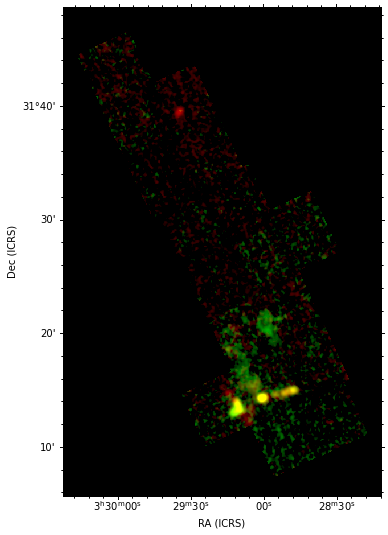

In [25]:
apl.make_rgb_image('shock_rgb.fits','shock_rgb.png',
                   vmin_r=0.075,stretch_r ='sqrt',
                   vmin_g=0.07,stretch_g ='sqrt',
                   vmin_b=50,vmax_b=60,stretch_b ='sqrt'
                   )
fig = apl.FITSFigure('shock_rgb_2d.fits')
fig.show_rgb('shock_rgb.png')

In [10]:
from astropy.stats import mad_std
from astropy.io import fits
import numpy as np


filepath = "C:\\Users\\alexf\Japan internship\\13CO\\ngc1333TP.13CO.cube.valueK.fits"
hdu = fits.open(filepath)[0]
h = hdu.header
data = hdu.data


from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
#bkg = Background2D(data, (50, 50), filter_size=(3, 3),
#                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
#print(bkg.background_median)
#print(bkg.background_rms_median)

rms_of_cube = np.sqrt(  np.nanmean(data**2  )  )
mad_std_cube = mad_std(data,ignore_nan=True)
print(rms_of_cube)
print(mad_std_cube)

0.541308
0.027674602504523624


In [53]:
import numpy as np

std_range = np.arange(5*rms_of_cube,stop=38.77,step=5*rms_of_cube)

for i in range(len(std_range)):
    print(std_range[i])

0.12348278425633907
0.24696556851267815
0.3704483527690172
0.4939311370253563
0.6174139212816954
0.7408967055380344
0.8643794897943735
0.9878622740507126
1.1113450583070517
1.2348278425633907
1.3583106268197298
1.4817934110760689
1.605276195332408
1.728758979588747
1.852241763845086
1.9757245481014252
2.0992073323577642
2.2226901166141033
2.3461729008704424
2.4696556851267815
2.5931384693831205
2.7166212536394596
2.8401040378957987
2.9635868221521378
3.087069606408477
3.210552390664816
3.334035174921155
3.457517959177494
3.581000743433833
3.704483527690172
3.8279663119465113
3.9514490962028503
4.074931880459189
4.1984146647155285
4.321897448971868
4.445380233228207
4.568863017484546
4.692345801740885
4.815828585997224
4.939311370253563
5.062794154509902
5.186276938766241
5.30975972302258
5.433242507278919
5.556725291535258
5.680208075791597
5.803690860047936
5.9271736443042755
6.050656428560615
6.174139212816954
6.297621997073293
6.421104781329632
6.544587565585971
6.66807034984231
6.7

RMS: 0.5442438125610352
MAD: 0.1621070485580441
Sigma: -3.448496272540069e-05


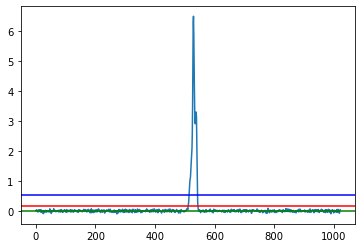

In [9]:
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
test_slice = data[:,300,400]

rms_test = np.sqrt(  np.nanmean(test_slice**2  )  )
mad_test = mad_std(test_slice,ignore_nan=True)
sigma_clipped_test,_,_ = sigma_clipped_stats(test_slice,sigma=5)

print(f"RMS: {rms_test}")
print(f"RMS_cube: {rms_of_cube}")
print(f"MAD: {mad_test*5}")
print(f"Mad_cube: {mad_std_cube*5}")
print(f"Sigma: {sigma_clipped_test*5}")
plt.plot(test_slice)
plt.axhline(rms_test,color='blue')
plt.axhline(mad_test*5,color='red')
plt.axhline(sigma_clipped_test*5,color='green')

In [1]:
for i in range(10,10+5):
    print(i)

10
11
12
13
14


In [64]:
input = np.array(range(10))
np_test = np.zeros((2,2), dtype=np.ndarray)
np_test[1][1] = input


np.save('np_test',np_test)
print(np.load('np_test.npy',allow_pickle=True))

[[0 0]
 [0 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]]


In [1]:
from multiprocessing import cpu_count
print(cpu_count())

8


In [4]:
from astropy.wcs import WCS
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib.pyplot as plt
import astropy.units as u


In [5]:
species = 'SO'
filepath = "C:\\Users\\alexf\Japan internship\\SO\\ngc1333TP.SO.peakT.valueK.fits"
data = fits.getdata(filepath)
wcs = WCS(fits.getheader(filepath))

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(20.0, 820.0)

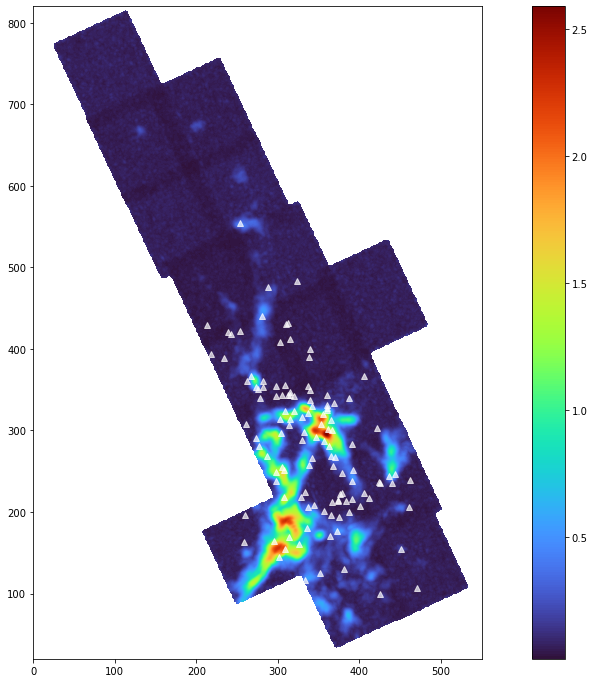

In [6]:
tab_yso = fits.open("gutermuth_YSO")
df_yso = Table(tab_yso[1].data).to_pandas()
yso_ra, yso_dec = df_yso['RAJ2000'], df_yso['DEJ2000']
yso_positions = SkyCoord(yso_ra*u.deg,yso_dec*u.deg)
yso_pixels = wcs.world_to_pixel(yso_positions)

plt.figure(figsize=(18, 12))
im = plt.imshow(data,cmap="turbo",origin="lower")
plt.colorbar(im)
#plt.contour(fil.skeleton, colors='red',alpha=0.7)
#plt.contour(fil.skeleton_longpath,colors='red',alpha = 0.7)
plt.plot(yso_pixels[0],yso_pixels[1],"w^",alpha=0.7)
plt.xlim([0,550])
plt.ylim([20,820])

In [23]:
help(regs.get_mpl_patches_texts)

Help on method get_mpl_patches_texts in module pyregion.core:

get_mpl_patches_texts(properties_func=None, text_offset=5.0, origin=1) method of pyregion.core.ShapeList instance
    Often, the regions files implicitly assume the lower-left
    corner of the image as a coordinate (1,1). However, the python
    convetion is that the array index starts from 0. By default
    (``origin=1``), coordinates of the returned mpl artists have
    coordinate shifted by (1, 1). If you do not want this shift,
    use ``origin=0``.



In [28]:
# Use custom function for patch attribute
from pyregion.mpl_helper import properties_func_default
def fixed_color(shape, saved_attrs):
    attr_list, attr_dict = saved_attrs
    attr_dict["color"] = "red"
    kwargs = properties_func_default(shape, (attr_list, attr_dict))

    return kwargs

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 fro

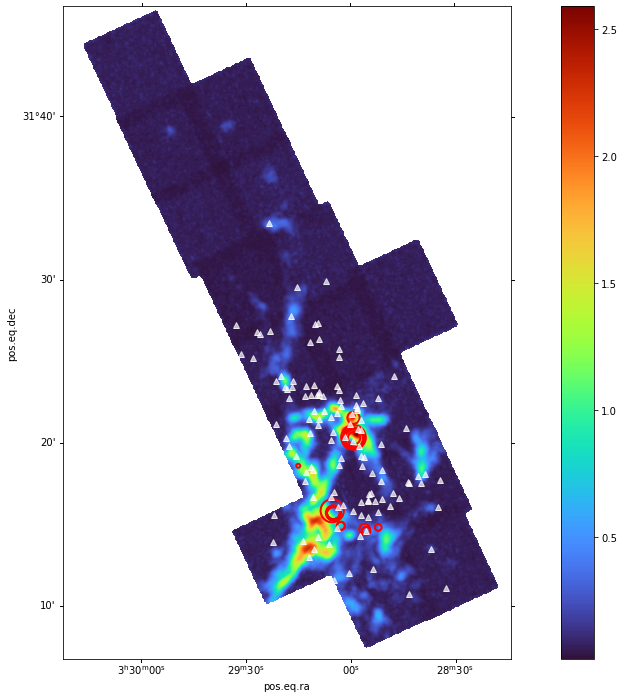

In [30]:
import pyregion
outflow_reg = pyregion.open("C:\\Users\\alexf\Japan internship\Spitzer\\CH3OH (4-3) - all outflow candidates.reg")

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection=wcs)
regs = outflow_reg.as_imagecoord(fits.getheader(filepath))
reg_list,artist_list = regs.get_mpl_patches_texts(fixed_color)
for r in reg_list:
    ax.add_patch(r)
    
#for a in artist_list:
#    ax.add_artist(a)
im = plt.imshow(data,cmap="turbo",origin="lower")

plt.plot(yso_pixels[0],yso_pixels[1],"w^",alpha=0.7)
plt.xlim([0,550])
plt.ylim([20,820])
plt.colorbar(im)

In [5]:
import multiprocessing as mp
import numpy as np
import warnings
from scipy.optimize import curve_fit
import scipy.optimize
from astropy.io import fits
from astropy.wcs import wcs



def v2ch(v, w): # convert velocity (km/s) to channel 
    x_tempo, y_tempo, v_tempo   = w.wcs_pix2world(0, 0, 0, 0)
    x_ch, y_ch, v_ch   = w.wcs_world2pix(x_tempo, y_tempo, v*1000.0, 0)
    v_ch = int(round(float(v_ch), 0))
    return v_ch

def ch2v(ch, w):#km/s
    x, y, v   = w.wcs_pix2world(0, 0, ch, 0)
    return v/1000.0

def del_header_key(header, keys): # delete header key
    import copy
    h = copy.deepcopy(header)
    for k in keys:
        try:
            del h[k]
        except:
            pass
    return h

def make_new_hdu_integ(hdu, v_start_wcs, v_end_wcs, w): # make header of integrated intensity map
    data = hdu.data
    header = hdu.header
    start_ch, end_ch = v2ch(v_start_wcs, w), v2ch(v_end_wcs, w)
    new_data = np.sum(data[start_ch:end_ch+1], axis=0)*np.abs(header["CDELT3"])/1000.0
    header = del_header_key(header, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "PC1_3", "PC2_3", "PC3_3", "PC3_1", "PC3_2"])
    header["NAXIS"] = 2
    new_hdu = fits.PrimaryHDU(new_data, header)
    return new_hdu

def make_new_hdu_integ_ch(hdu, v_start_ch, v_end_ch, w): # make header of integrated intensity map
    
    data = hdu.data
    header = hdu.header
    new_data = np.sum(data[v_start_ch:v_end_ch], axis=0)*header["CDELT3"]/1000.0
    header = del_header_key(header, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "PC1_3", "PC2_3", "PC3_3", "PC3_1", "PC3_2"])
    header["NAXIS"] = 2
    new_hdu = fits.PrimaryHDU(new_data, header)
    return new_hdu
def gaussian(velocity,A,v_0, sigma):
    return (A * np.exp( - (velocity-v_0)**2 / (2*sigma**2)))

def gaussian_to_max(ra,dec,current_slice,index=0):
    # Find V_rad channel at max T
    try:
        channel_max = np.nanargmax(current_slice)
    except ValueError:
       # print(f"Ra index: {ra}, Dec index: {dec} is all Nans. Skipping...")
        return (np.nan,np.nan,np.nan)
    
    if channel_max <= 10:
        print(f"Max before channel 10: Ra = {ra}, Dec = {dec} - Thread {index}")
        return (np.nan,np.nan,np.nan)
    # Fit gaussian to channel
    try:
        velocity_current_cont = velocity_cont[channel_max-10:channel_max+10]
        selected_current_slice = current_slice[channel_max-10:channel_max+10]
        
        if (len(np.isfinite(selected_current_slice))<=4):
            print(f"Fewer than 5 data points: Ra = {ra}, Dec = {dec} - Thread {index}")
            return (np.nan,np.nan,np.nan)

        pop, pcov = curve_fit(gaussian,xdata=velocity_current_cont,ydata=selected_current_slice,p0=[5, velocity_cont[channel_max],20],nan_policy='omit',bounds=([0,-85,0],[1000,95,100]))
    except RuntimeError:
        print(f"Runtime error: Ra = {ra}, Dec = {dec} - Thread {index}")
        return (np.nan,np.nan,np.nan)
    except IndexError:
        print(f"Index error: Ra = {ra}, Dec = {dec} - Thread {index}")
        return (np.nan,np.nan,np.nan)
    except scipy.optimize._optimize.OptimizeWarning:
        print(f"Inditerminate covariance: Ra = {ra}, Dec = {dec} - Thread {index}")
        return (np.nan,np.nan,np.nan)
    
    # Construct continuus gaussian and subtract from data 
    fitted_gauss = gaussian(velocity_cont,pop[0],pop[1],pop[2])
    residuals = current_slice - fitted_gauss
    errors = np.sqrt(np.diag(pcov))
    return (residuals,pop,errors)
    
def process_chunk(data, index=0, dec_start_local=0):
    # Initialize lists instead of arrays
    residuals_local = []
    fit_params_local = []
    fit_errors_local = []
    
    shape = np.shape(data)
    ra_len = shape[2]
    dec_len = shape[1]
    
    for ra in range(ra_len):
        dec_pixel = dec_start_local
        print(f'Processing RA: {ra}/{ra_len}, dec length: {dec_len} - Thread {index}')
        
        for dec in range(dec_len):
            
            for i in range(2):
                if i == 0:
                    current_slice = data[:, dec, ra]
                    current_residuals = np.zeros_like(current_slice)
                else:
                    current_slice = current_residuals
                    
                current_slice = np.where(current_slice >= threshold, current_slice, np.nan)
                current_residuals, fit_param, fit_error = gaussian_to_max(ra + 1, dec_pixel + 1, current_slice, index)
                
                if np.isnan(current_residuals).all():
                    current_residuals = current_slice
                    fit_param, fit_error = (np.nan, np.nan, np.nan), (np.nan, np.nan, np.nan)
                else:
                    print(f"Ra pixel: {ra + 1}, Dec pixel {dec_pixel + 1} worked. V_0 = {fit_param[1]} - Thread {index}")
                
                # Append data to lists
                residuals_local.append(current_residuals)
                fit_params_local.append(fit_param)
                fit_errors_local.append(fit_error)
                
            dec_pixel += 1
        
    print(f"Thread {index} finished :)")
    
    # Convert lists to arrays
    residuals_local = np.array(residuals_local)
    fit_params_local = np.array(fit_params_local)
    fit_errors_local = np.array(fit_errors_local)
    
    np.save(f'output/residuals_chunk_{index}',residuals_local)
    np.save(f'output/fitparams_chunk_{index}',fit_params_local)
    np.save(f'output/fiterrors_chunk_{index}',fit_errors_local)
    
    return 0


species = '13CO'
filepath = "C:\\Users\\alexf\\Japan internship\\13CO\\ngc1333TP.13CO.cube.valueK.fits"

# Make optmize warning into errors (i.e. covariance can't be estimated so it is a poorfit
warnings.filterwarnings('error','Covariance of the parameters could not be estimated',scipy.optimize._optimize.OptimizeWarning)

hdu = fits.open(filepath)[0]
h = hdu.header
data = hdu.data
w = wcs.WCS(h)
# RMS of data for threshold
#rms_of_cube = np.sqrt(  np.nanmean(data**2  )  )
threshold = rms_of_cube * 1
data_shape = np.shape(data)
vrad_len = data_shape[0]
ra_len = data_shape[2]
dec_len = data_shape[1]

channel_cont = np.arange(0,vrad_len)
velocity_cont = ch2v(channel_cont,w)





thread_count = 6
chunks = np.array_split(data,thread_count,axis=1)



ra_start, dec_start,thread_id = [],[],[]
payload = []
previous_dec_start = 0
for i in range(6):
    if i!= 0:
        shape_current = np.shape(chunks[i])
        current_dec_start = shape_current[1]
        dec_start = np.append(dec_start,current_dec_start+previous_dec_start)
        
        previous_dec_start = current_dec_start + previous_dec_start
        
    else:
        dec_start = np.append(dec_start,0)
        
    thread_id.append(i)
        
    payload.append([chunks[i],thread_id[i],dec_start[i]])
        

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [13]:
print(payload[0][2])

0.0
